In [1]:
import re
import sys
from time import time, sleep
from pprint import pprint
from functools import partial
from multiprocessing import Pool

import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt

FILENAME1 = "main.cpp"
FILENAME2 = "main2.cpp"

In [2]:
!cp ../answer/main.cpp ./{FILENAME1}
!cp ../answer/main2.cpp ./{FILENAME2}

In [3]:
!g++ {FILENAME1} -std=gnu++17 -Wall -Wextra -O2 -o {FILENAME1}.out
!g++ {FILENAME2} -std=gnu++17 -Wall -Wextra -O2 -o {FILENAME2}.out

main.cpp:49: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
   49 | #pragma clang attribute push (__attribute__((target("arch=skylake"))),apply_to=function)
      | 
main.cpp:1579: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
 1579 | #pragma clang attribute pop
      | 
main.cpp: In function ‘void globals::UpdateValueTable()’:
main.cpp:883:15: warning: unused variable ‘vm’ [-Wunused-variable]
  883 |   const auto& vm = v_modified[idx_RCSEV];
      |               ^~
main.cpp: In function ‘void Solve()’:
main.cpp:1370:54: warning: suggest parentheses around ‘-’ in operand of ‘&’ [-Wparentheses]
 1370 |    r = (unsigned)rng.next() & (1 << hash_table_size) - 1;
      |                               ~~~~~~~~~~~~~~~~~~~~~~~^~~
main.cpp:1448:72: warning: missing initializer for member ‘Solve()::Node::action’ [-Wmissing-field-initializers]
 1448 |   node_buffer.push({ state_buffer[0].score, nullptr, &state_buffer[0] });
      |                                  

In [4]:
N_TESTCASES = 200
TESTCASE_DIRECTORY = "../exp008_simple_hash/in/"
TESTCASES = [f"{i:04d}.txt" for i in range(N_TESTCASES)]

In [5]:
# 最適化前

scores = []
times = []

!mkdir out

def parallel(i):
    testcase = TESTCASES[i]
    i = f"{i:04d}"
    t0 = time()
    !./{FILENAME1}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase} 2> /dev/null
    t = time() - t0
    score = !python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}{testcase} ./out/{testcase}
    print(i, f"time:{t:.4f}", *score)
    score = int(score[0].split(":")[-1])
    return score, t

for i in range(200):
    score, t = parallel(i)
    scores.append(score)
    times.append(t)

# with Pool(15) as p:
#     for score, t in p.map(parallel, range(N_TESTCASES)):
#         scores.append(score)
#         times.append(t)

np.mean(scores) * 50 / 1e6, np.std(scores) * 50 / 1e6

mkdir: cannot create directory ‘out’: File exists
0000 time:1.8519 score:4889930
0001 time:1.8469 score:5313752
0002 time:1.8593 score:4802254
0003 time:1.8786 score:4951716
0004 time:1.8637 score:4687024
0005 time:1.8863 score:5108096
0006 time:1.8778 score:4901952
0007 time:1.8492 score:5463515
0008 time:1.8389 score:5407440
0009 time:1.8459 score:4838977
0010 time:1.8616 score:4590013
0011 time:1.8624 score:5252812
0012 time:1.8695 score:4494676
0013 time:1.8935 score:5135132
0014 time:1.8798 score:5352973
0015 time:1.8492 score:5629560
0016 time:1.8272 score:5054957
0017 time:1.8687 score:4654626
0018 time:1.8677 score:5308666
0019 time:1.8512 score:4572018
0020 time:1.8304 score:5419963
0021 time:1.8535 score:5022492
0022 time:1.8832 score:4752297
0023 time:1.8456 score:4821238
0024 time:1.8665 score:5050667
0025 time:1.8726 score:4529753
0026 time:1.8299 score:5027731
0027 time:1.8542 score:5452976
0028 time:1.8725 score:4915280
0029 time:1.8425 score:5180493
0030 time:1.8624 sco

(249.0740015, 17.610132433841112)

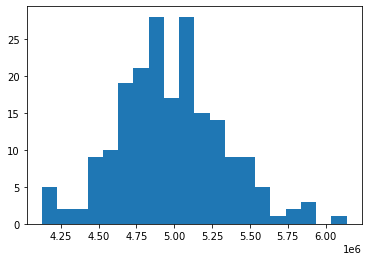

In [6]:
plt.hist(scores, bins=20)
plt.show()

In [7]:
# 最適化後

scores = []
times = []

!mkdir out

def parallel(i):
    testcase = TESTCASES[i]
    i = f"{i:04d}"
    t0 = time()
    !./{FILENAME2}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase} 2> /dev/null
    t = time() - t0
    score = !python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}{testcase} ./out/{testcase}
    print(i, f"time:{t:.4f}", *score)
    score = int(score[0].split(":")[-1])
    return score, t

for i in range(200):
    score, t = parallel(i)
    scores.append(score)
    times.append(t)

# with Pool(15) as p:
#     for score, t in p.map(parallel, range(N_TESTCASES)):
#         scores.append(score)
#         times.append(t)

np.mean(scores) * 50 / 1e6, np.std(scores) * 50 / 1e6

mkdir: cannot create directory ‘out’: File exists
0000 time:1.8553 score:4772876
0001 time:1.8582 score:5342915
0002 time:1.8417 score:4640951
0003 time:1.8928 score:4834574
0004 time:1.8454 score:4438857
0005 time:1.8353 score:4940478
0006 time:1.8630 score:4646307
0007 time:1.8700 score:5548384
0008 time:1.8537 score:5468838
0009 time:1.8118 score:4969189
0010 time:1.8459 score:4539354
0011 time:1.8636 score:5241958
0012 time:1.8741 score:4488892
0013 time:1.8445 score:5102052
0014 time:1.8614 score:5522275
0015 time:1.8665 score:5461676
0016 time:1.8525 score:5050333
0017 time:1.8360 score:4578729
0018 time:1.8496 score:4855130
0019 time:1.8631 score:4630670
0020 time:1.8496 score:5211510
0021 time:1.8607 score:5090548
0022 time:1.8384 score:4831179
0023 time:1.8617 score:4686172
0024 time:1.8841 score:4867703
0025 time:1.8829 score:4544720
0026 time:1.8513 score:4866459
0027 time:1.8290 score:5295137
0028 time:1.8446 score:4895645
0029 time:1.8493 score:5297576
0030 time:1.8554 sco

(247.54177275, 17.608565110913208)

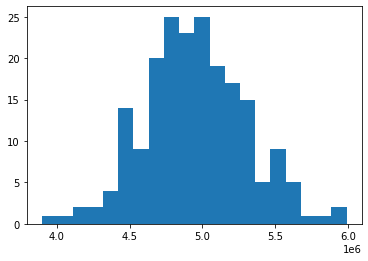

In [8]:
plt.hist(scores, bins=20)
plt.show()